<a href="https://colab.research.google.com/github/LaTarn14/Pretrained-Language-Model/blob/main/Wisesight_with_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare

In [ ]:
!gdown 1zaYxGMQkFIzk8fRv7O696geQPhRkKs2Q
!unzip Wisesight_data.zip

Downloading...
From: https://drive.google.com/uc?id=1zaYxGMQkFIzk8fRv7O696geQPhRkKs2Q
To: /content/Wisesight_data.zip
100% 1.83M/1.83M [00:00<00:00, 139MB/s]
Archive:  Wisesight_data.zip
  inflating: wisesight_test.csv      
  inflating: __MACOSX/._wisesight_test.csv  
  inflating: wisesight_train.csv     
  inflating: __MACOSX/._wisesight_train.csv  


In [ ]:
# 50-unit embeddings
!gdown --id 14lAF3cOiYkcagFvNnW4o9BKIDXMB0RPg

# 100-unit embeddings
!gdown --id 14bv_aTSP-8rs_Bkudvpp8zcU3UpyRen6

# 200-unit embeddings
!gdown --id 14k1PLN9MVszCK6zUIRcLzWLwEGdR0ABw

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=14lAF3cOiYkcagFvNnW4o9BKIDXMB0RPg
To: /content/TNC_embeddings-50.bin
100% 13.6M/13.6M [00:00<00:00, 94.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=14bv_aTSP-8rs_Bkudvpp8zcU3UpyRen6
To: /content/TNC_embeddings-100.bin
100% 25.9M/25.9M [00:00<00:00, 131MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Down

In [ ]:
%tensorflow_version 2.x
import csv
import numpy as np
import pandas as pd
from numpy.linalg import norm
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image, display_png
from gensim.models import word2vec, KeyedVectors
from keras.models import Sequential
from keras.layers import (Input, Embedding, Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling1D, Conv1D, Conv2D, GlobalMaxPooling1D, Conv1DTranspose)

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import RMSprop, Optimizer
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Prepare (for create wisesight.csv)

In [ ]:
!gdown https://drive.google.com/drive/folders/1hpXXzBpCwW0JCN195UgiCyzhIqpsRuRR?usp=sharing --folder

Retrieving folder list
Processing file 19MaauTGiXV8HsbpwYoNxvRYvkvTu1Zn0 PyThaiNLP-wisesight-sentiment-4f0cafe.zip
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=19MaauTGiXV8HsbpwYoNxvRYvkvTu1Zn0
To: /content/Wisesight_sentiment/PyThaiNLP-wisesight-sentiment-4f0cafe.zip
100% 4.27M/4.27M [00:00<00:00, 86.6MB/s]
Download completed


In [ ]:
!unzip /content/Wisesight_sentiment/PyThaiNLP-wisesight-sentiment-4f0cafe.zip

Archive:  /content/Wisesight_sentiment/PyThaiNLP-wisesight-sentiment-4f0cafe.zip
   creating: PyThaiNLP-wisesight-sentiment-4f0cafe/
  inflating: __MACOSX/._PyThaiNLP-wisesight-sentiment-4f0cafe  
  inflating: PyThaiNLP-wisesight-sentiment-4f0cafe/.DS_Store  
  inflating: __MACOSX/PyThaiNLP-wisesight-sentiment-4f0cafe/._.DS_Store  
   creating: PyThaiNLP-wisesight-sentiment-4f0cafe/kaggle-competition/
  inflating: __MACOSX/PyThaiNLP-wisesight-sentiment-4f0cafe/._kaggle-competition  
  inflating: PyThaiNLP-wisesight-sentiment-4f0cafe/README.md  
  inflating: __MACOSX/PyThaiNLP-wisesight-sentiment-4f0cafe/._README.md  
  inflating: PyThaiNLP-wisesight-sentiment-4f0cafe/exploration.ipynb  
  inflating: __MACOSX/PyThaiNLP-wisesight-sentiment-4f0cafe/._exploration.ipynb  
  inflating: PyThaiNLP-wisesight-sentiment-4f0cafe/.gitignore  
  inflating: __MACOSX/PyThaiNLP-wisesight-sentiment-4f0cafe/._.gitignore  
  inflating: PyThaiNLP-wisesight-sentiment-4f0cafe/q.txt  
  inflating: __MACOSX/Py

In [ ]:
%tensorflow_version 2.x
import csv
import numpy as np
import pandas as pd
from numpy.linalg import norm
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image, display_png
from gensim.models import word2vec, KeyedVectors
from keras.models import Sequential
from keras.layers import (Input, Embedding, Dense, Dropout, Flatten, GlobalAveragePooling1D, Conv1D, GlobalMaxPooling1D)

from tensorflow.keras import layers, regularizers
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!pip install pythainlp
import pythainlp
from pythainlp import sent_tokenize, word_tokenize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 11.9 MB/s 


In [ ]:
!pip install attacut
import attacut

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 23.8 MB/s 
     |████████████████████████████████| 473 kB 48.9 MB/s 
     |████████████████████████████████| 87 kB 7.0 MB/s 
     |████████████████████████████████| 15.7 MB 53.2 MB/s 
     |████████████████████████████████| 965 kB 52.9 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=7e119bfc3f5a9fd5d88538fd4fed43cce7a46012a8e1449bd354313127d83501
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=03f9902af28f6bf1b5f525475c1b5c2fa99026d724f09cd19b4e30c95dfd1a99
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built docopt fire
  Attempting uninstall: numpy
    Found existing installation:

In [ ]:
train_txt = open("PyThaiNLP-wisesight-sentiment-4f0cafe/kaggle-competition/train.txt")
train_label_txt = open("PyThaiNLP-wisesight-sentiment-4f0cafe/kaggle-competition/train_label.txt")
test_txt = open("PyThaiNLP-wisesight-sentiment-4f0cafe/kaggle-competition/test.txt")
test_label_txt = open("PyThaiNLP-wisesight-sentiment-4f0cafe/kaggle-competition/test_label.txt")

In [ ]:
train_txt_dict = dict()
train_label_dict = dict()
test_txt_dict = dict()
test_label_dict = dict()
# punct = ['\n','#','.','…',' ','\'','\"','  ',':','!','@','&','*','-','/','%','ๆ','+','$','(',')','_','=',';','<','>','[',']','|']
punct = ['\n','#']
num = 0
for sent in train_txt:
  ori_sent = sent
  for element in punct:
    sent = sent.replace('เเ','แ').replace(element,'')
  if len(sent) == 0:
    sent = ori_sent
  train_txt_dict[num] = '|'.join(word_tokenize(sent, 
                                               keep_whitespace=True, 
                                               engine='attacut'))
  num += 1

num = 0
for sent in train_label_txt:
  for element in punct:
    sent = sent.replace(element,'')
  train_label_dict[num] = sent
  num+=1

num = 0
for sent in test_txt:
  ori_sent = sent
  for element in punct:
    sent = sent.replace('เเ','แ').replace(element,'')
  if len(sent) == 0:
    sent = ori_sent
  test_txt_dict[num] = '|'.join(word_tokenize(sent, 
                                              keep_whitespace=True, 
                                              engine='attacut'))
  num += 1

num = 0
for sent in test_label_txt:
  for element in punct:
    sent = sent.replace(element,'')
  test_label_dict[num] = sent
  num += 1

In [ ]:
train_txt_dict[0]

'ประเทศ|เรา|ผลิต|และ|ส่ง|ออก|ยาสูบ|เยอะ|สุด|ใน|โลก|จิง|ป่าวคับ'

In [ ]:
with open('wisesight_train.csv', 'w', encoding='UTF8') as f:
  writer = csv.writer(f)
  writer.writerow(['text','label'])
  all_list = []
  for i in range(len(train_txt_dict)):
      row = [train_txt_dict[i]]
      row.append(train_label_dict[i])
      all_list.append(row)
  writer.writerows(all_list)

with open('wisesight_test.csv', 'w', encoding='UTF8') as f:
  writer = csv.writer(f)
  writer.writerow(['text','label'])
  all_list = []
  for i in range(len(test_txt_dict)):
    row = [test_txt_dict[i]]
    row.append(test_label_dict[i])
    all_list.append(row)
  writer.writerows(all_list)

In [ ]:
from google.colab import files
files.download('wisesight_train.csv')
files.download('wisesight_test.csv')

# Load the word embeddings and the data

In [ ]:
w2v_model = KeyedVectors.load_word2vec_format('TNC_embeddings-200.bin', 
                                              binary=True, unicode_errors='ignore')
vocab_size = len(w2v_model.vocab)
vector_dim = w2v_model.vector_size
# make weight matrix of word embedding, vocab size + 1 (for padding)
embedding_matrix = np.zeros((vocab_size+1, vector_dim), dtype="float32")
embedding_matrix[0] = np.zeros(vector_dim)
word_to_index = {word:i+1 for i, word in enumerate(w2v_model.vocab)}
# word to index dictionary, 0 for padding, UNKNOWN
word_to_index['PADDING'] = 0 

for i, word in enumerate(w2v_model.vocab):
    embedding_matrix[i+1] = w2v_model[word] 
    
# load data
train, dev = np.split(pd.read_csv('wisesight_train.csv', encoding='utf-8'),[int(len(pd.read_csv('wisesight_train.csv'))*0.80)])
test = pd.read_csv('wisesight_test.csv', encoding='utf-8')

def convert_words(df, word_to_index, max_length):
    for sent in df['text']:
      if type(sent) != float and type(sent) != int:
        sent = sent.split('|')
    tokens = df['text']
    # tokens = df['text'].apply(lambda x: x.split('|'))
    list_of_list_of_indices = list(tokens.map(lambda x: [word_to_index.get(word, 0) for word in x]))
    return pad_sequences(list_of_list_of_indices, max_length, padding='post', value=0, truncating='post')

# max length (กำหนดเอง)
max_len = 1000
train_x = convert_words(train, word_to_index, max_len)
dev_x = convert_words(dev, word_to_index, max_len)
test_x = convert_words(test, word_to_index, max_len)
num_classes = 4

def get_label(df):
    sentiment_to_label = {'pos':0, 'neg':1, 'neu':2, 'q':3}
    # apply functions & convert to np.array
    label = np.array(df['label'].replace(sentiment_to_label).tolist())
    df['label'] = label
    return to_categorical(label, num_classes=num_classes)

# label : one-hot vector
train_y = get_label(train)
dev_y = get_label(dev)
test_y = get_label(test)

In [ ]:
train['length'] = train['text'].apply(lambda x: x.count('|'))
train.length.describe()

# Train the models

In [ ]:
def make_deep_average_net(print_model=True):
    # instantiation
    model = Sequential()

    # add embedding layer
    model.add(Embedding(input_dim=vocab_size+1,
                        input_length=max_len,
                        output_dim=vector_dim, 
                        weights=[embedding_matrix], 
                        mask_zero=False,
                        trainable=True))

    # average
    model.add(GlobalAveragePooling1D())

    # add hidden layer
    model.add(Dense(150,activation='relu'))
    model.add(Dense(150,activation='relu'))
    model.add(Dense(150,activation='relu'))

    # add output layer
    model.add(Dense(num_classes, activation='softmax'))

    # compile model
    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
    if print_model:
        model.summary()
        plot_model(model, show_shapes=True,to_file='model.png')
        display_png(Image('model.png'))
    return model

In [ ]:
model = make_deep_average_net()

In [ ]:
# train
history = model.fit(train_x, train_y, batch_size=130, epochs=15, validation_data=(dev_x, dev_y))

Epoch 1/15
149/149 [==============================] - 7s 43ms/step - loss: 1.0215 - accuracy: 0.5557 - val_loss: 0.9891 - val_accuracy: 0.5782
Epoch 2/15
149/149 [==============================] - 6s 40ms/step - loss: 0.9676 - accuracy: 0.5798 - val_loss: 1.0127 - val_accuracy: 0.5882
Epoch 3/15
149/149 [==============================] - 6s 41ms/step - loss: 0.9465 - accuracy: 0.5870 - val_loss: 0.9887 - val_accuracy: 0.5134
Epoch 4/15
149/149 [==============================] - 6s 40ms/step - loss: 0.9327 - accuracy: 0.5939 - val_loss: 0.9429 - val_accuracy: 0.5894
Epoch 5/15
149/149 [==============================] - 6s 41ms/step - loss: 0.9241 - accuracy: 0.5945 - val_loss: 0.9684 - val_accuracy: 0.5878
Epoch 6/15
149/149 [==============================] - 6s 41ms/step - loss: 0.9151 - accuracy: 0.6022 - val_loss: 0.9340 - val_accuracy: 0.6011
Epoch 7/15
149/149 [==============================] - 6s 40ms/step - loss: 0.9084 - accuracy: 0.6036 - val_loss: 1.0298 - val_accuracy: 0.5552

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='best')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='best')
plt.show()

In [ ]:
def make_cnn_model(print_model=True):
    filters = 1000 #number of filters in your Convnet
    kernel_size = 5 # a window size of 3 tokens
    hidden_dims = 250 #number of neurons at the normal feedforward NN

    cnn_model = Sequential()
    cnn_model.add(Embedding(input_dim=vocab_size+1,
                        input_length=max_len,
                        output_dim=vector_dim, 
                        weights=[embedding_matrix], 
                        #mask_zero=True,
                        trainable=True))
    cnn_model.add(Conv1D(filters,
                        kernel_size,
                        kernel_regularizer=regularizers.l2(l2=5e-4),
                        bias_regularizer=regularizers.l2(l2=5e-4),
                        input_shape=(max_len ,vector_dim),
                        #padding='valid',
                        activation='relu',
                        strides=1,))
    cnn_model.add(GlobalMaxPooling1D())
    cnn_model.add(BatchNormalization())
    #GlobalMaxPooling1D(n) default = 2.
    cnn_model.add(Dense(hidden_dims, activation='relu'))
    cnn_model.add(Dense(hidden_dims, activation='relu'))
    cnn_model.add(Dropout(0.8))
    cnn_model.add(Dense(4, activation='softmax'))
    # compile model
    opt = tensorflow.keras.optimizers.Adam(learning_rate=3.5e-4,epsilon=1e-9,amsgrad=True,decay=0.0)
    cnn_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    # if print_model:
    #     cnn_model.summary()
    #     plot_model(cnn_model, show_shapes=True,to_file='model.png')
    #     display_png(Image('model.png'))
    return cnn_model

In [ ]:
cnn_model = make_cnn_model()

In [ ]:
cnn_history = cnn_model.fit(train_x, train_y, batch_size=16, epochs=10, validation_data=(dev_x, dev_y))

Epoch 1/10
1204/1204 [==============================] - 55s 45ms/step - loss: 1.3159 - accuracy: 0.5261 - val_loss: 1.0784 - val_accuracy: 0.6144
Epoch 2/10
1204/1204 [==============================] - 53s 44ms/step - loss: 1.1480 - accuracy: 0.5962 - val_loss: 1.0240 - val_accuracy: 0.6347
Epoch 3/10
1204/1204 [==============================] - 53s 44ms/step - loss: 1.0826 - accuracy: 0.6213 - val_loss: 0.9654 - val_accuracy: 0.6620
Epoch 4/10
1204/1204 [==============================] - 53s 44ms/step - loss: 1.0285 - accuracy: 0.6398 - val_loss: 0.9324 - val_accuracy: 0.6869
Epoch 5/10
1204/1204 [==============================] - 55s 45ms/step - loss: 0.9778 - accuracy: 0.6562 - val_loss: 0.9236 - val_accuracy: 0.6788
Epoch 6/10
1204/1204 [==============================] - 53s 44ms/step - loss: 0.9359 - accuracy: 0.6728 - val_loss: 0.9276 - val_accuracy: 0.6769
Epoch 7/10
1204/1204 [==============================] - 55s 46ms/step - loss: 0.9036 - accuracy: 0.6858 - val_loss: 0.8895 -

In [ ]:
# train
cnn_history = cnn_model.fit(train_x, train_y, batch_size=128, epochs=12, validation_data=(dev_x, dev_y))

Epoch 1/12
151/151 [==============================] - 7s 42ms/step - loss: 1.2571 - accuracy: 0.5111 - val_loss: 1.0356 - val_accuracy: 0.5971
Epoch 2/12
151/151 [==============================] - 6s 42ms/step - loss: 1.0942 - accuracy: 0.5795 - val_loss: 0.9803 - val_accuracy: 0.6264
Epoch 3/12
151/151 [==============================] - 6s 40ms/step - loss: 1.0276 - accuracy: 0.6137 - val_loss: 0.9363 - val_accuracy: 0.6501
Epoch 4/12
151/151 [==============================] - 6s 41ms/step - loss: 0.9758 - accuracy: 0.6381 - val_loss: 0.9073 - val_accuracy: 0.6642
Epoch 5/12
151/151 [==============================] - 7s 43ms/step - loss: 0.9369 - accuracy: 0.6565 - val_loss: 0.8924 - val_accuracy: 0.6736
Epoch 6/12
151/151 [==============================] - 7s 44ms/step - loss: 0.9028 - accuracy: 0.6698 - val_loss: 0.8805 - val_accuracy: 0.6815
Epoch 7/12
151/151 [==============================] - 6s 41ms/step - loss: 0.8692 - accuracy: 0.6839 - val_loss: 0.8656 - val_accuracy: 0.6834

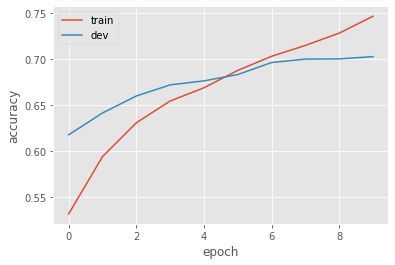

In [ ]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='best')
plt.show()

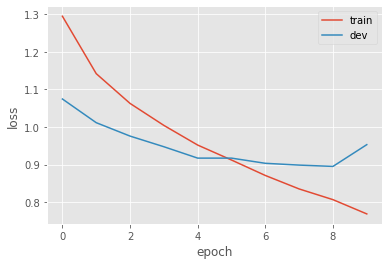

In [ ]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='best')
plt.show()

In [ ]:
prediction = [np.argmax(x) for x in model.predict(dev_x)]
print(classification_report(dev['label'], prediction))

In [ ]:
model.evaluate(dev_x, dev_y)[1]

In [ ]:
prediction = [np.argmax(x) for x in cnn_model.predict(dev_x)]
print(classification_report(dev['label'], prediction))

              precision    recall  f1-score   support

           0       0.68      0.28      0.40       844
           1       0.75      0.61      0.67      1221
           2       0.69      0.90      0.78      2659
           3       0.64      0.10      0.17        89

    accuracy                           0.70      4813
   macro avg       0.69      0.47      0.51      4813
weighted avg       0.70      0.70      0.68      4813



In [ ]:
cnn_model.evaluate(dev_x, dev_y)[1]

151/151 [==============================] - 1s 4ms/step - loss: 0.8790 - accuracy: 0.6929


0.6929150223731995

In [ ]:
prediction = [np.argmax(x) for x in cnn_model.predict(test_x)]
print(classification_report(test['label'], prediction))

# Hyperparameters and Regularization


In [ ]:
from tensorflow.keras.optimizers import Adam, Adagrad

In [ ]:
# from tensorflow.keras.optimizers import optimizer 
from tensorflow import keras
from keras import optimizers
model.compile(optimizer =keras.optimizers.Adagrad(learning_rate=0.001), 
              loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
Dense(hidden_dims, activation='relu',
      kernel_regularizer=regularizers.l2(l2=1e-4),
      bias_regularizer=regularizers.l2(1e-4))

In [ ]:
model.add(Dropout(0.4))

# (Extra) Training the same model multiple times

In [ ]:
dan_accs = []
for i in range(20):
    model = make_deep_average_net(print_model=False)
    model.fit(train_x, train_y, batch_size=128, epochs=10, validation_data=(dev_x, dev_y))
    dan_accs.append(model.evaluate(dev_x, dev_y)[1])

In [ ]:
cnn_accs = []
for i in range(20):
    model = make_cnn_model(print_model=False)
    model.fit(train_x, train_y, batch_size=128, epochs=10, validation_data=(dev_x, dev_y))
    cnn_accs.append(model.evaluate(dev_x, dev_y)[1])

In [ ]:
cnn_accs_df = pd.DataFrame(cnn_accs)
print(cnn_accs_df.round(4))
cnn_accs_df.describe()

In [ ]:
dan_accs_df = pd.DataFrame(dan_accs, columns=['DAN'])
print(dan_accs_df.round(4))
dan_accs_df.describe()

In [ ]:
pd.concat([dan_accs_df.describe(), cnn_accs_df.describe()], axis=1)